In [1]:
import os, sys
cur_dir = os.getcwd()
basename = os.path.basename(cur_dir)
for _ in range(5):
    if basename != 'OCLog':
        cur_dir = os.path.dirname(cur_dir)
        basename = os.path.basename(cur_dir)
        #print(cur_dir, basename)
    else:
        if cur_dir not in sys.path:
            sys.path.append(cur_dir)
            #print(sys.path)
import os
from openpyxl import Workbook
from openpyxl import load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tqdm import trange, tqdm, tnrange
from oclog.BGL.bglv1 import BGLog
from oclog.openset.opensetv12 import OpenSet
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
import sklearn.metrics as m
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.manifold import TSNE
tf.random.set_seed(1234)
np.random.seed(1234) 

In [4]:
# from collections import namedtuple
# HIST = namedtuple("HIST", "history")
# history = {'training_loss': 1, 'pt_f1_tr': 2, 'pt_f1_val': 3}
# hist = HIST(history)
# hist.history
import numpy as np
l = [[0.1805], [0.5668], [0.3981], [0.4844], [0.5123]]
l = np.array(l)
l.shape
l = np.reshape(l, (5))
l.shape

(5,)

In [5]:
oset = OpenSet()
train_data, val_data,  test_data, bglog  = oset.get_bgdata(bg_class_obj=BGLog, save_padded_num_sequences=False, 
                                                           load_from_pkl=True, ablation=1500,
                                                           debug=False,
                                                          designated_ukc_cls=5)

extracting all the values from your input parameter
padded_num_seq_df loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_ukc.pkl
trained tokenizer, tk, loaded from C:\Users\Bhujay_ROG\MyDev\OCLog\oclog\BGL\data\bgl_tk.pkl
train_0:, 1200, val_0:, 150, test_0:, 150, train_1:, 1200, val_1:, 150, test_1:, 150, train_2:, 1200, val_2:, 150, test_2:, 150, class 5 is added as ukc
ukc_5:, 150
length of train_data - (num_seq_per_cls * num_class)// batch size: 112
get_bgdata  num_classses: 3 and self.num_classes: 3


extracting all the values from your input parameter
vocab_size: 50
2023-03-16 16:46:37.509084
starting to create ptmodel automatically
epoch: 1/10, train_loss: 4.529413223266602, train_acc: 46.46, F1_train: 0.374 val_loss: 4.529413223266602, val_acc: 60.04,, F1_val: 0.4986
epoch: 2/10, train_loss: 3.5964136123657227, train_acc: 39.82, F1_train: 0.3254 val_loss: 3.5964136123657227, val_acc: 59.38,, F1_val: 0.5002
epoch: 3/10, train_loss: 2.8915202617645264, train_acc: 51.65, F1_train: 0.4459 val_loss: 2.8915202617645264, val_acc: 60.71,, F1_val: 0.5099
epoch: 4/10, train_loss: 2.6371142864227295, train_acc: 76.93, F1_train: 0.7728 val_loss: 2.6371142864227295, val_acc: 96.21,, F1_val: 0.962
epoch: 5/10, train_loss: 2.3101351261138916, train_acc: 86.89, F1_train: 0.8662 val_loss: 2.3101351261138916, val_acc: 99.11,, F1_val: 0.991
epoch: 6/10, train_loss: 2.081571102142334, train_acc: 86.13, F1_train: 0.8592 val_loss: 2.081571102142334, val_acc: 99.55,, F1_val: 0.9955
epoch: 7/10, train_l

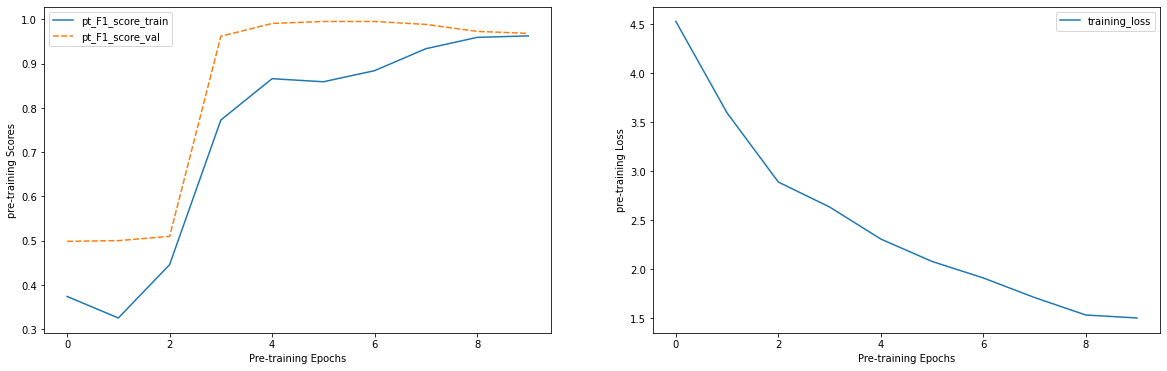

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


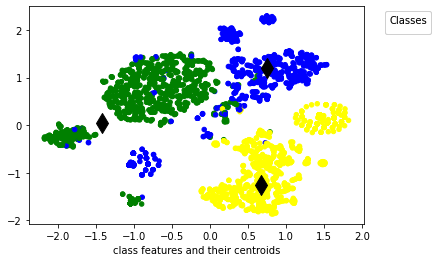

run_id:  2023-03-16_16_48_54.531665_56438330c3ec11ed9a10ac8247733f47


In [6]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=10, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=1.5, )

vocab_size: 50
got all the dataset
epoch: 1/20, train_loss: 1.2749360799789429, train_acc: 53.85, F1_train: 0.4359857360651865 val_loss: 1.2749360799789429, val_acc: 59.6,, F1_val: 0.5005399241248298
epoch: 2/20, train_loss: 0.9823929667472839, train_acc: 57.65, F1_train: 0.4633190687415616 val_loss: 0.9823929667472839, val_acc: 66.29,, F1_val: 0.5519674919876495
epoch: 3/20, train_loss: 1.1435736417770386, train_acc: 81.28, F1_train: 0.7946603860609288 val_loss: 1.1435736417770386, val_acc: 99.55,, F1_val: 0.9955357142857143
epoch: 4/20, train_loss: 1.4204583168029785, train_acc: 83.29, F1_train: 0.8174814021542406 val_loss: 1.4204583168029785, val_acc: 99.11,, F1_val: 0.9910708487178869
epoch: 5/20, train_loss: 1.6754099130630493, train_acc: 76.95, F1_train: 0.7348733345642972 val_loss: 1.6754099130630493, val_acc: 66.29,, F1_val: 0.552451573849879
epoch: 6/20, train_loss: 2.22611403465271, train_acc: 76.12, F1_train: 0.7236416916883306 val_loss: 2.22611403465271, val_acc: 66.07,, F1

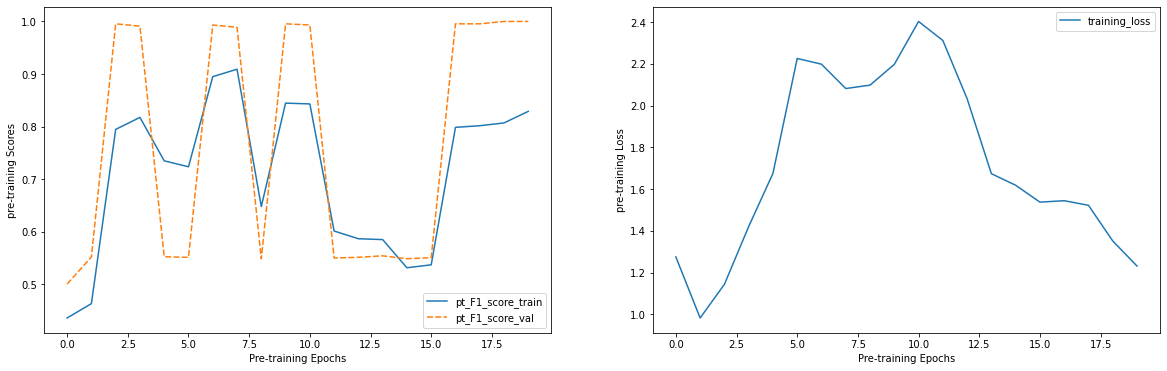

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


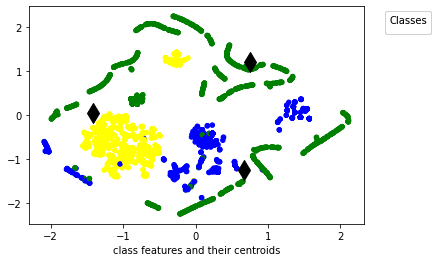

run_id:  2022-05-10_19_48_35.461912_14246af3d06c11ec88a4ac8247733f47


In [16]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=20, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=1.5, )

vocab_size: 50
got all the dataset
epoch: 1/30, train_loss: 1.2075698375701904, train_acc: 38.59, F1_train: 0.2635590992120203 val_loss: 1.2075698375701904, val_acc: 40.62,, F1_val: 0.29633910131155566
epoch: 2/30, train_loss: 0.7494522929191589, train_acc: 56.19, F1_train: 0.4505710250337223 val_loss: 0.7494522929191589, val_acc: 63.39,, F1_val: 0.530721327423415
epoch: 3/30, train_loss: 0.8613086342811584, train_acc: 58.48, F1_train: 0.4698687698987766 val_loss: 0.8613086342811584, val_acc: 56.25,, F1_val: 0.45885518061864594
epoch: 4/30, train_loss: 0.9450007081031799, train_acc: 81.42, F1_train: 0.8056747749402783 val_loss: 0.9450007081031799, val_acc: 96.21,, F1_val: 0.9619149884267671
epoch: 5/30, train_loss: 1.2497562170028687, train_acc: 89.65, F1_train: 0.8936316306793098 val_loss: 1.2497562170028687, val_acc: 100.0,, F1_val: 1.0
epoch: 6/30, train_loss: 1.290158987045288, train_acc: 95.9, F1_train: 0.9586322919064332 val_loss: 1.290158987045288, val_acc: 100.0,, F1_val: 1.0
e

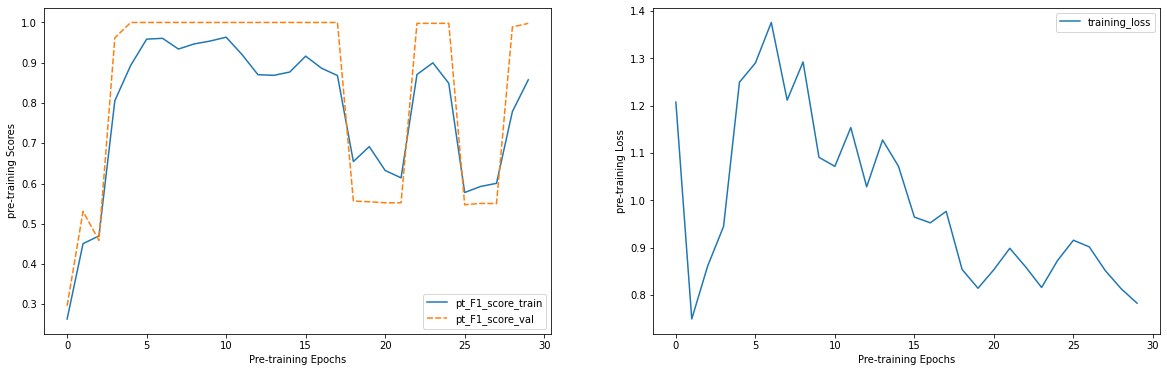

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


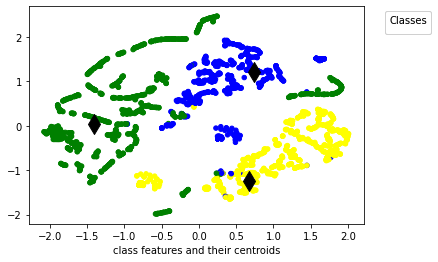

run_id:  2022-05-10_19_27_56.764717_31d239c3d06911eca3fdac8247733f47


In [13]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=30, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=1, )

vocab_size: 50
got all the dataset
epoch: 1/30, train_loss: 1.135764718055725, train_acc: 56.84, F1_train: 0.456890638452903 val_loss: 1.135764718055725, val_acc: 65.85,, F1_val: 0.5508825345156583
epoch: 2/30, train_loss: 0.6581698060035706, train_acc: 57.59, F1_train: 0.46097312176197774 val_loss: 0.6581698060035706, val_acc: 66.52,, F1_val: 0.5540719090326715
epoch: 3/30, train_loss: 0.6821496486663818, train_acc: 84.68, F1_train: 0.8368952526821741 val_loss: 0.6821496486663818, val_acc: 99.78,, F1_val: 0.9977678320069625
epoch: 4/30, train_loss: 0.7174261212348938, train_acc: 88.7, F1_train: 0.8830094185639713 val_loss: 0.7174261212348938, val_acc: 99.78,, F1_val: 0.9977678571428571
epoch: 5/30, train_loss: 0.775386393070221, train_acc: 94.22, F1_train: 0.9415333494593409 val_loss: 0.775386393070221, val_acc: 100.0,, F1_val: 1.0
epoch: 6/30, train_loss: 0.8513697981834412, train_acc: 97.04, F1_train: 0.970306568608821 val_loss: 0.8513697981834412, val_acc: 100.0,, F1_val: 1.0
epoch

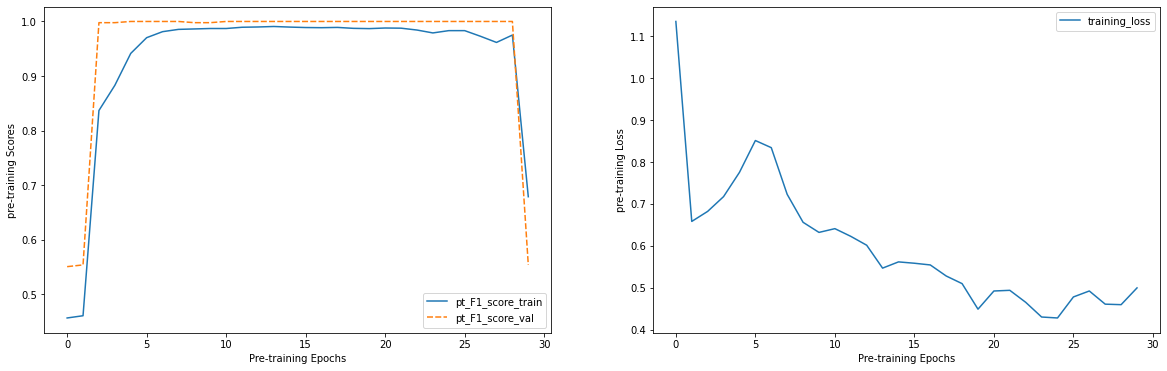

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


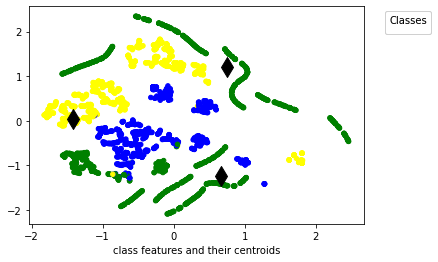

run_id:  2022-05-10_19_37_52.735334_950c1fffd06a11ec95cfac8247733f47


In [14]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=30, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=.5 )

vocab_size: 50
got all the dataset
epoch: 1/14, train_loss: 1.1314094066619873, train_acc: 43.64, F1_train: 0.33109832837401754 val_loss: 1.1314094066619873, val_acc: 43.75,, F1_val: 0.3399654311424616
epoch: 2/14, train_loss: 0.5894518494606018, train_acc: 73.07, F1_train: 0.7158437370947153 val_loss: 0.5894518494606018, val_acc: 99.78,, F1_val: 0.9977678822787518
epoch: 3/14, train_loss: 0.6342081427574158, train_acc: 87.25, F1_train: 0.8674349417605828 val_loss: 0.6342081427574158, val_acc: 100.0,, F1_val: 1.0
epoch: 4/14, train_loss: 0.7271813750267029, train_acc: 91.8, F1_train: 0.9162976614539937 val_loss: 0.7271813750267029, val_acc: 100.0,, F1_val: 1.0
epoch: 5/14, train_loss: 0.7651101350784302, train_acc: 94.92, F1_train: 0.9487275245855772 val_loss: 0.7651101350784302, val_acc: 99.55,, F1_val: 0.995535312043455
epoch: 6/14, train_loss: 0.9093636274337769, train_acc: 97.24, F1_train: 0.9722391626184775 val_loss: 0.9093636274337769, val_acc: 100.0,, F1_val: 1.0
epoch: 7/14, tr

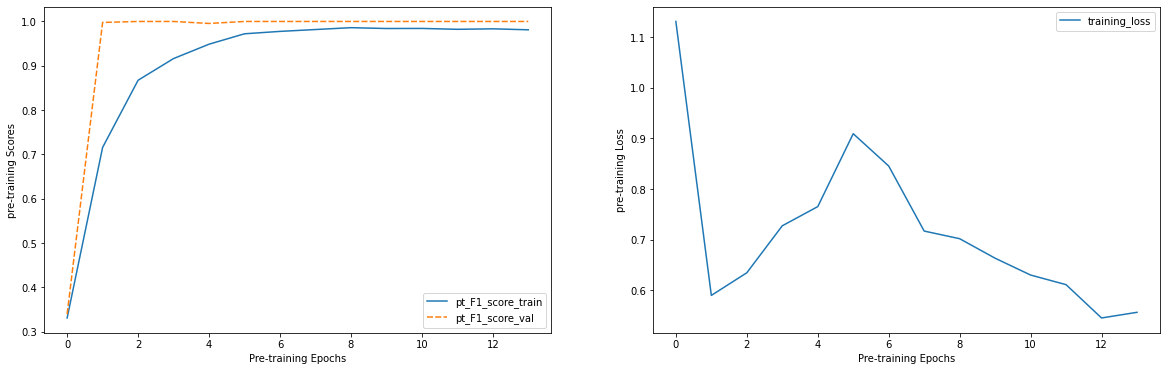

got all the dataset
the color map for the classes, here index postion are the class number: ['green' 'blue' 'yellow' 'red']


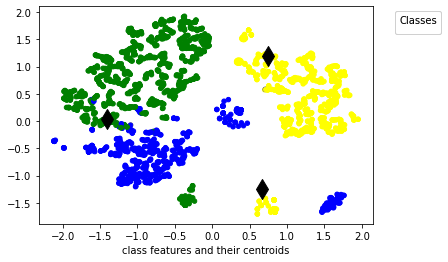

run_id:  2022-05-10_19_43_01.157960_4ce1aed0d06b11ec8352ac8247733f47


In [15]:
tf.random.set_seed(1234)
np.random.seed(1234) 
res = oset.ptmodel_custom_train(train_data=train_data, val_data=val_data,
                 test_data=test_data, bglog=bglog, 
                 manual_color_map=True, centroid_black=True,                               
                 tsne_n_iter=2000, tsne_perplexity=8,
                 embedding_size=12, oc_lr=2.5, pt_epochs=14, oc_epochs=2,
                save_ptmodel=False, save_ocmodel=False, oc_centroid_plot=False,
                               halpha=0.7, hbeta=.5 )